# Correlação de palavras entre tweets sobre determinado HashTag

Queremos determinar quais palavras estão mais correlacionadas entre Tweets sobre determinado HashTag, utilizando o pacote **widyr**.

Cleuton Sampaio

In [1]:
library(twitteR)
library(ROAuth)
library(httr)
library(plyr)
library(stringr)
library(tidytext)
library(readr)
library(dplyr)
library(widyr)



Attaching package: ‘plyr’

The following object is masked from ‘package:twitteR’:

    id


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:twitteR’:

    id, location

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Vamos obter os Tweets. Substitua os parâmetros abaixo por: **api_key**, **api_secret**, **access_token**, e  **access_token_secret**. Você os obtém em https://apps.twitter.com

In [2]:
setup_twitter_oauth('1', '2', '3', '4')


[1] "Using direct authentication"


Vamos obter os Tweets relacionados ao hashTag #brazil. O que os gringos falaram sobre o Brasil esta semana?

In [3]:
tweets_nc <- searchTwitter('#brazil', lang='en', n = 1000)

Vamos transformar em um Datafame e adicionar um identificador de cada linha:

In [4]:
df <- twListToDF(tweets_nc)
nrow(df)

[1] 1000

In [5]:
df$sessao <- seq.int(nrow(df))


Agora, vamos transformar em formato Tidy, mas antes, precisamos carregar a lista de stopwords em inglês: 

In [6]:
stopwords <- read_csv('stopwords.txt', col_names = 'word')

Parsed with column specification:
cols(
  word = col_character()
)


In [7]:
head(stopwords)

word
i
me
my
myself
we
our


In [8]:
tidy_tweets <- df %>%
    unnest_tokens(word, text) %>%
    anti_join(stopwords,by="word") 
head(tidy_tweets)

favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude,sessao,word
FALSE,0,NA,2018-03-13 22:43:30,FALSE,NA,973691046671548416,NA,"<a href=""https://www.github.com/arun4033622"" rel=""nofollow"">HeyFellowHuman</a>",100DaysOfXBot,1,TRUE,FALSE,NA,NA,1,rt
FALSE,0,NA,2018-03-13 22:43:30,FALSE,NA,973691046671548416,NA,"<a href=""https://www.github.com/arun4033622"" rel=""nofollow"">HeyFellowHuman</a>",100DaysOfXBot,1,TRUE,FALSE,NA,NA,1,jpamm08
FALSE,0,NA,2018-03-13 22:43:30,FALSE,NA,973691046671548416,NA,"<a href=""https://www.github.com/arun4033622"" rel=""nofollow"">HeyFellowHuman</a>",100DaysOfXBot,1,TRUE,FALSE,NA,NA,1,day
FALSE,0,NA,2018-03-13 22:43:30,FALSE,NA,973691046671548416,NA,"<a href=""https://www.github.com/arun4033622"" rel=""nofollow"">HeyFellowHuman</a>",100DaysOfXBot,1,TRUE,FALSE,NA,NA,1,5
FALSE,0,NA,2018-03-13 22:43:30,FALSE,NA,973691046671548416,NA,"<a href=""https://www.github.com/arun4033622"" rel=""nofollow"">HeyFellowHuman</a>",100DaysOfXBot,1,TRUE,FALSE,NA,NA,1,finished
FALSE,0,NA,2018-03-13 22:43:30,FALSE,NA,973691046671548416,NA,"<a href=""https://www.github.com/arun4033622"" rel=""nofollow"">HeyFellowHuman</a>",100DaysOfXBot,1,TRUE,FALSE,NA,NA,1,html5


In [9]:
correlacao <- tidy_tweets %>%
    group_by(word) %>%
    filter(n() > 20) %>%
    pairwise_cor(word, sessao, sort = TRUE)
correlacao

item1,item2,correlation
birds,tanager,1.0000000
cute,tanager,1.0000000
bird,tanager,1.0000000
animal,tanager,1.0000000
tanager,birds,1.0000000
cute,birds,1.0000000
bird,birds,1.0000000
animal,birds,1.0000000
tanager,cute,1.0000000
birds,cute,1.0000000


In [10]:
set.seed(42)
library(ggplot2)


In [11]:
library(igraph)
library(ggraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



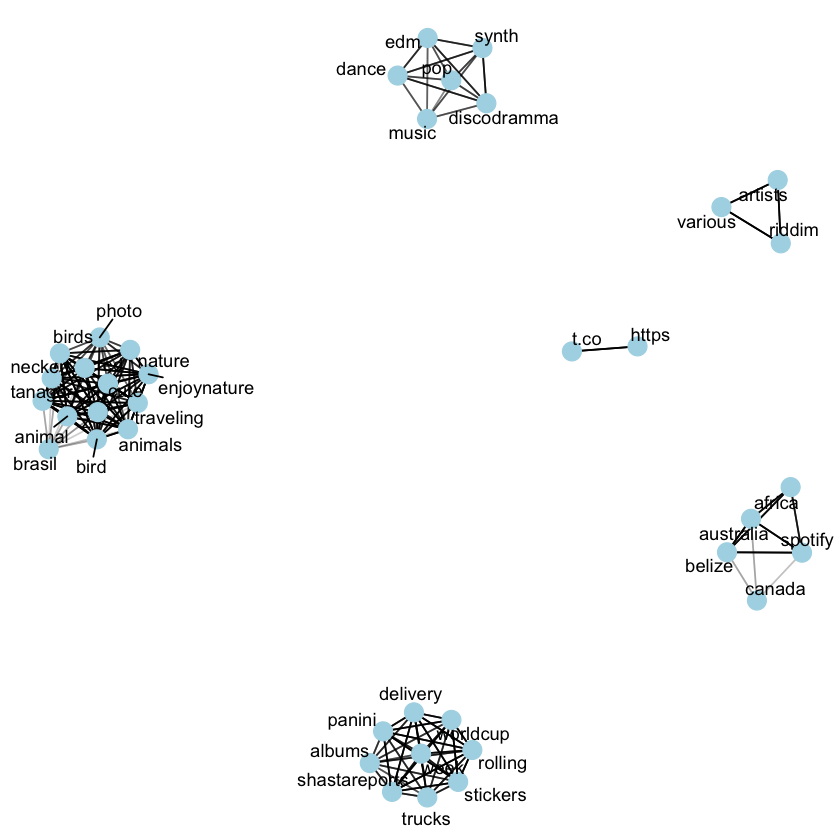

In [15]:
correlacao %>%
    filter(correlation > .70) %>%
    graph_from_data_frame() %>%
    ggraph(layout = 'fr') + 
    geom_edge_link(aes(edge_alpha = correlation), show.legend = FALSE) + 
    geom_node_point(color = 'lightblue', size = 5) + 
    geom_node_text(aes(label = name), repel = TRUE) + 
    theme_void()